In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
S1_train = pd.read_csv('Bimbola_Train.csv')
S1_test = pd.read_csv('Bimbola_Test.csv')

S2_train = pd.read_csv('Daniel_Train.csv')
S2_test = pd.read_csv('Daniel_Test.csv')

S3_train = pd.read_csv('Simi_Train.csv')
S3_test = pd.read_csv('Simi_Test.csv')

S4_train = pd.read_csv('Samson_Train.csv')

S5_test = pd.read_csv('Precious_Test.csv')


In [14]:
S5_test.head()

,A,B,C,timestamp,marker,i
0,2.621206,-0.897732,0.559191,827969.564368,calib-begin,0
1,3.361291,-1.107828,0.899683,827974.291773,imag_grasp,1
2,3.663670,-1.167531,1.250616,827979.062817,imag_release,2
3,3.475903,-1.073246,1.399193,827983.802940,imag_grasp,3
4,2.900032,-0.854979,1.146346,827988.539023,imag_release,4


In [15]:
# Remove the calib-begin and calib-end
S1_train = S1_train[1:-1]
S1_test = S1_test[1:-1]

S2_train = S2_train[1:-1]
S2_test = S2_test[1:-1]

S3_train = S3_train[1:-1]
S3_test = S3_test[1:-1]

S4_train = S4_train[1:-1]

S5_test = S5_test[1:-1]

# concatenate train data
SI_train = pd.concat([S1_train, S2_train, S3_train, S4_train], ignore_index=True)
SI_test = pd.concat([S1_test, S2_test, S3_test, S5_test], ignore_index=True)

In [16]:
# 'imag_release' - 0,  'imag_grasp' - 1


In [17]:
# S1
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as lg
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import AdaBoostClassifier as abc
from sklearn.ensemble import GradientBoostingClassifier as gbc

lsvc = LinearSVC()
svc = SVC(probability=True)
lgr = lg()
rfclf = rfc()
ada = abc()
grad = gbc()

S_learn = SI_train[['A', 'B', 'C']]
y_learn = SI_train['marker'].factorize()[0]
S_valid = SI_test[['A', 'B', 'C']]
y_valid = SI_test['marker'].factorize()[0]

lsvc.fit(S_learn, y_learn)
svc.fit(S_learn, y_learn)
lgr.fit(S_learn, y_learn)
rfclf.fit(S_learn, y_learn)
ada.fit(S_learn, y_learn)
grad.fit(S_learn, y_learn)

C:\Users\ELUDIORA MICHAEL\.conda\envs\tensorflow\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GradientBoostingClassifier()

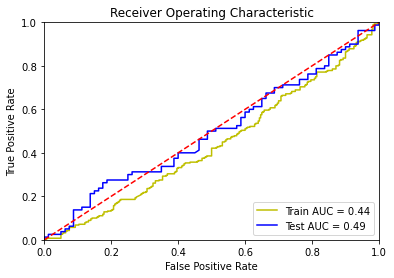

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

spr_train = svc.predict_proba(S_learn)[:,1]
spr_valid = svc.predict_proba(S_valid)[:,1]

fpr, tpr, thresholds = roc_curve(y_learn, spr_train)
roc_auc = auc(fpr, tpr)

tfpr, ttpr, thresholds = roc_curve(y_valid, spr_valid)
troc_auc = auc(tfpr, ttpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'Train AUC = %0.2f' % roc_auc)
plt.plot(tfpr, ttpr, 'b', label = 'Test AUC = %0.2f' % troc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.savefig('PCA3c_svm.png', dpi =400)

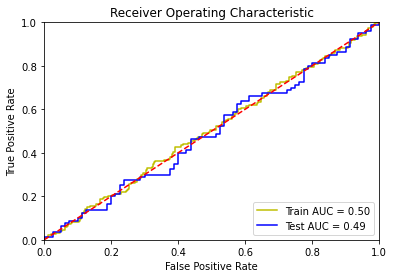

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

lpr_train = lgr.predict_proba(S_learn)[:,1]
lpr_valid = lgr.predict_proba(S_valid)[:,1]

fpr, tpr, thresholds = roc_curve(y_learn, lpr_train)
roc_auc = auc(fpr, tpr)

tfpr, ttpr, thresholds = roc_curve(y_valid, lpr_valid)
troc_auc = auc(tfpr, ttpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'Train AUC = %0.2f' % roc_auc)
plt.plot(tfpr, ttpr, 'b', label = 'Test AUC = %0.2f' % troc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.savefig('PCA3c_lgr.png', dpi =400)

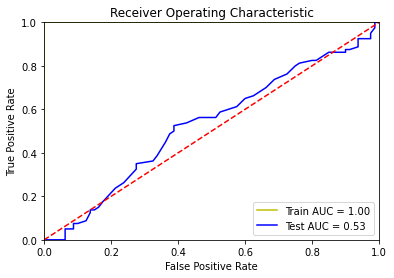

In [20]:
#rfclf  ada grad

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

rfpr_train = rfclf.predict_proba(S_learn)[:,1]
rfpr_valid = rfclf.predict_proba(S_valid)[:,1]

fpr, tpr, thresholds = roc_curve(y_learn, rfpr_train)
roc_auc = auc(fpr, tpr)

tfpr, ttpr, thresholds = roc_curve(y_valid, rfpr_valid)
troc_auc = auc(tfpr, ttpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'Train AUC = %0.2f' % roc_auc)
plt.plot(tfpr, ttpr, 'b', label = 'Test AUC = %0.2f' % troc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.savefig('PCA3c_rfclf.png', dpi =400)

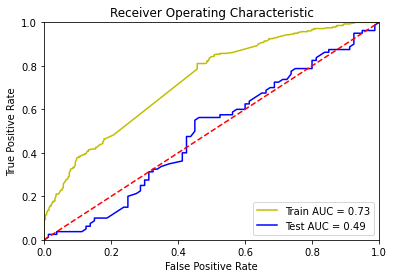

In [21]:
#rfclf  ada grad

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

adpr_train = ada.predict_proba(S_learn)[:,1]
adpr_valid = ada.predict_proba(S_valid)[:,1]

fpr, tpr, thresholds = roc_curve(y_learn, adpr_train)
roc_auc = auc(fpr, tpr)

tfpr, ttpr, thresholds = roc_curve(y_valid, adpr_valid)
troc_auc = auc(tfpr, ttpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'Train AUC = %0.2f' % roc_auc)
plt.plot(tfpr, ttpr, 'b', label = 'Test AUC = %0.2f' % troc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.savefig('PCA3c_ada.png', dpi =400)

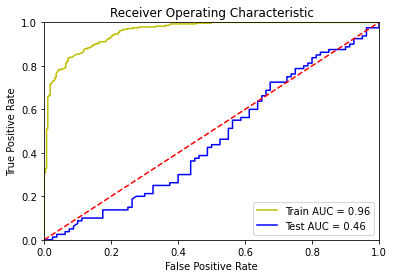

In [24]:
#rfclf  ada grad

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

gpr_train = grad.predict_proba(S_learn)[:,1]
gpr_valid = grad.predict_proba(S_valid)[:,1]

fpr, tpr, thresholds = roc_curve(y_learn, gpr_train)
roc_auc = auc(fpr, tpr)

tfpr, ttpr, thresholds = roc_curve(y_valid, gpr_valid)
troc_auc = auc(tfpr, ttpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'Train AUC = %0.2f' % roc_auc)
plt.plot(tfpr, ttpr, 'b', label = 'Test AUC = %0.2f' % troc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.savefig('PCA3c_grad.png', dpi =400)

In [23]:
print('________________________________________________\n')
print('LinearSVC')
print(f'Subject_1 accuracy train score {lsvc.score(S_learn, y_learn)}')
print(f'Subject_1 accuracy test score {lsvc.score(S_valid, y_valid)}')

print('________________________________________________\n')
print('SVC')
print(f'Subject_1 accuracy train score {svc.score(S_learn, y_learn)}')
print(f'Subject_1 accuracy test score {svc.score(S_valid, y_valid)}')

print('________________________________________________\n')
print('LogisticRegression')
print(f'Subject_1 accuracy train score {lgr.score(S_learn, y_learn)}')
print(f'Subject_1 accuracy test score {lgr.score(S_valid, y_valid)}')

print('________________________________________________\n')
print('RandomForest')
print(f'Subject_1 accuracy train score {rfclf.score(S_learn, y_learn)}')
print(f'Subject_1 accuracy test score {rfclf.score(S_valid, y_valid)}')

print('________________________________________________\n')
print('AdaBoost')
print(f'Subject_1 accuracy train score {ada.score(S_learn, y_learn)}')
print(f'Subject_1 accuracy test score {ada.score(S_valid, y_valid)}')

print('________________________________________________\n')
print('GradientBoost')
print(f'Subject_1 accuracy train score {grad.score(S_learn, y_learn)}')
print(f'Subject_1 accuracy test score {grad.score(S_valid, y_valid)}')


________________________________________________

LinearSVC
Subject_1 accuracy train score 0.4928571428571429
Subject_1 accuracy test score 0.49375
________________________________________________

SVC
Subject_1 accuracy train score 0.5232142857142857
Subject_1 accuracy test score 0.50625
________________________________________________

LogisticRegression
Subject_1 accuracy train score 0.5071428571428571
Subject_1 accuracy test score 0.48125
________________________________________________

RandomForest
Subject_1 accuracy train score 1.0
Subject_1 accuracy test score 0.56875
________________________________________________

AdaBoost
Subject_1 accuracy train score 0.6678571428571428
Subject_1 accuracy test score 0.5125
________________________________________________

GradientBoost
Subject_1 accuracy train score 0.8732142857142857
Subject_1 accuracy test score 0.45625
